In [1]:
from keras.applications import VGG16
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import os

Using TensorFlow backend.


In [2]:
vgg16 = VGG16(include_top=True, weights='imagenet')
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
!ls ../data/train/

ls: cannot access '../data/train/': No such file or directory


In [5]:
from keras.preprocessing import image
import numpy as np
image_folder = '../data/train/diptera'
img_path = os.path.join(image_folder,'000.jpg')
img = image.load_img(img_path,target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n02259212', 'leafhopper', 0.59168756), ('n02264363', 'lacewing', 0.12693703), ('n01773549', 'barn_spider', 0.10155882), ('n01770081', 'harvestman', 0.099436201), ('n02229544', 'cricket', 0.036753554)]]


In [6]:
image_folder = '../data/train/ephemeroptera'

In [7]:
img_path = os.path.join(image_folder, '001.jpg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n02229544', 'cricket', 0.5010497), ('n02226429', 'grasshopper', 0.35485786), ('n02231487', 'walking_stick', 0.051797844), ('n02264363', 'lacewing', 0.03397125), ('n02236044', 'mantis', 0.024469109)]]


In [8]:
import numpy as np
import time
from keras.applications import vgg16
from keras import backend as K

In [9]:
from matplotlib import pyplot as plt

%matplotlib inline

In [10]:
# dimensions of the generated pictures for each filter.
IMG_WIDTH = 224
IMG_HEIGHT = 224

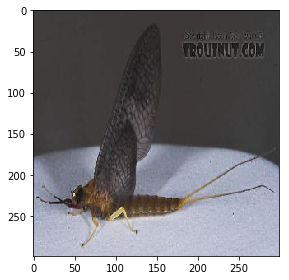

In [14]:
from skimage.io import imread, imshow
a = '../data/train/ephemeroptera/010.jpg'
b = imread(a)
imshow(b)
plt.show()

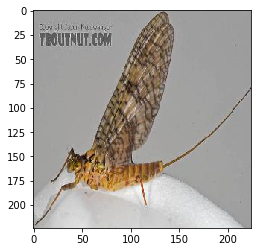

In [26]:
img_path = os.path.join(image_folder, '053.jpg')
img = image.load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
plt.imshow(img)

In [19]:
from keras.applications import vgg16

# build the VGG16 network with ImageNet weights
vgg16 = vgg16.VGG16(weights='imagenet', include_top=False)
print('Model loaded.')

Model loaded.


In [20]:
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [21]:
from collections import OrderedDict
layer_dict = OrderedDict()
# get the symbolic outputs of each "key" layer (we gave them unique names).
for layer in vgg16.layers[1:]:
    layer_dict[layer.name] = layer

In [22]:
def get_activations(model, layer, input_img_data):
    activations_f = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activations_f((input_img_data, False))
    return activations

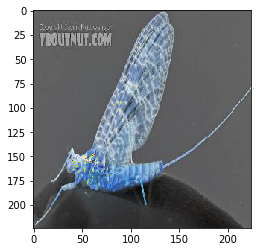

In [27]:
input_img_data = image.img_to_array(img)
# input_img_data /= 255
plt.imshow(input_img_data)

In [28]:
input_img_data = np.expand_dims(input_img_data, axis=0)
print('Input image shape:', input_img_data.shape)

Input image shape: (1, 224, 224, 3)


In [29]:
layer_name = 'block1_conv2'
layer = layer_dict[layer_name]
activations = get_activations(vgg16, layer, input_img_data)

In [30]:
print(len(activations))
activation = activations[0]
activation.shape

1


(1, 224, 224, 64)

In [31]:
layer.filters  # no. of filters in the selected conv block


64

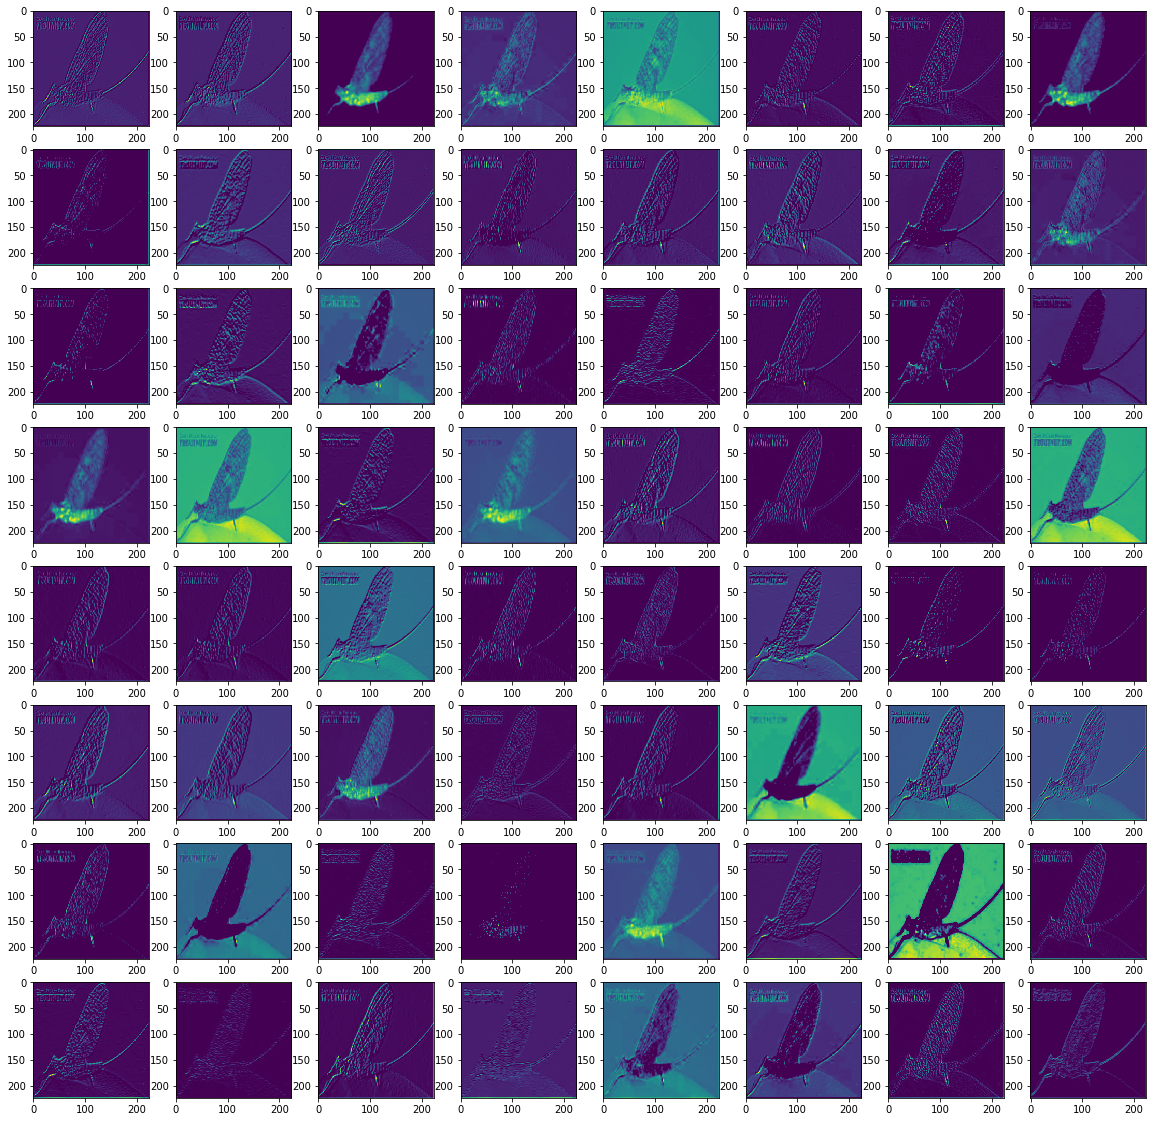

In [32]:
activated_img = activation[0]
n = 8
fig = plt.figure(figsize=(20, 20))
for i in range(n):
    for j in range(n):
        idx = (n*i)+j
        ax = fig.add_subplot(n, n, idx+1)
        ax.imshow(activated_img[:,:,idx])

In [38]:
conv_img_mean = np.mean(activated_img, axis=2)

In [39]:
conv_img_mean.shape

(224, 224)

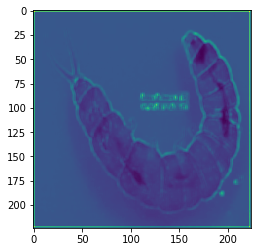

In [40]:
plt.imshow(conv_img_mean)

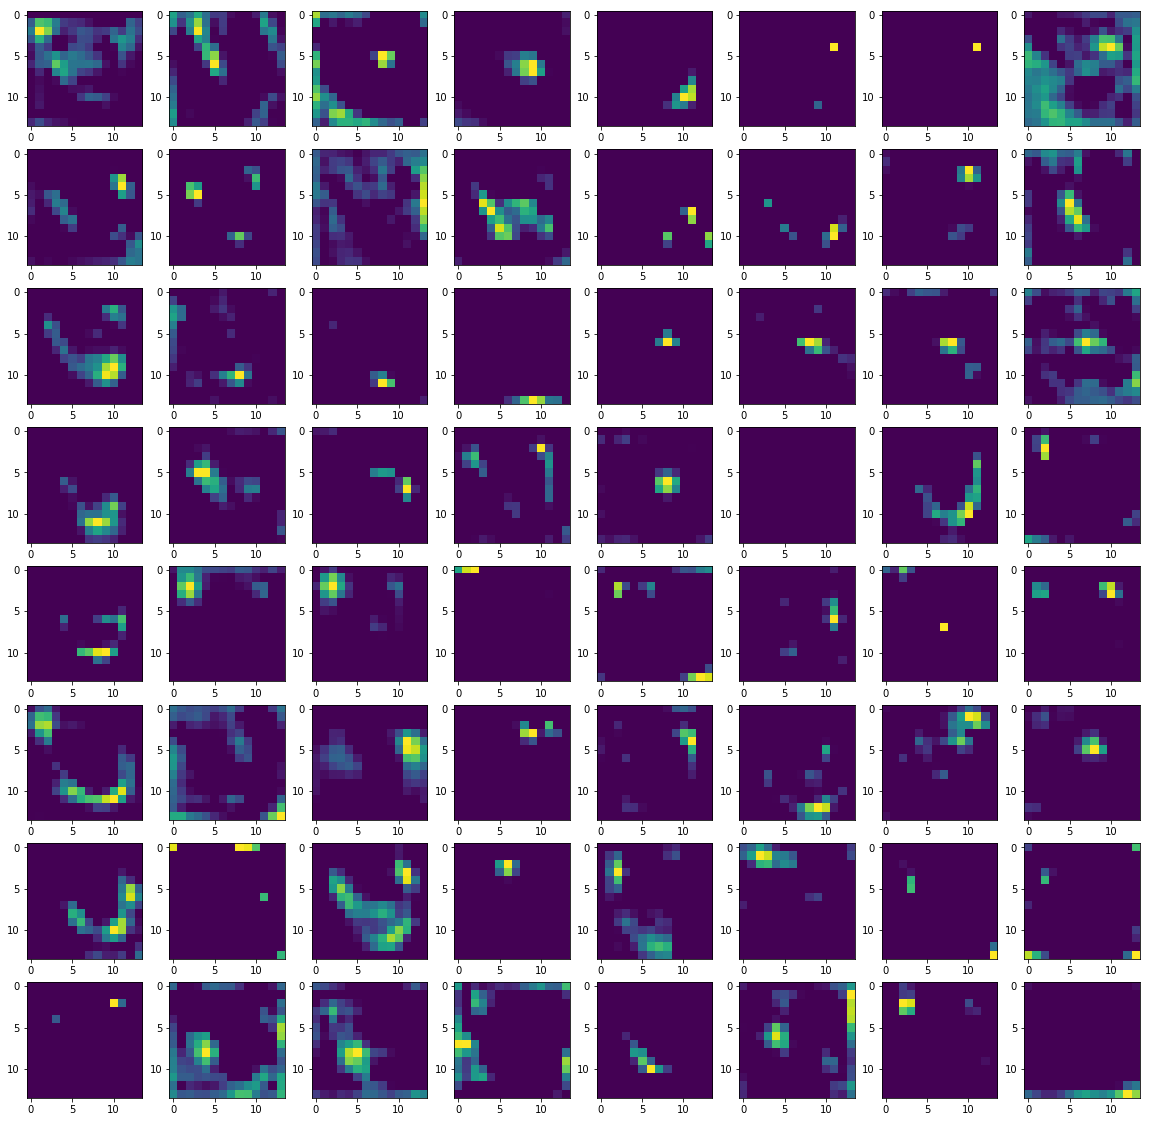

In [41]:
layer_name = 'block5_conv2'
layer = layer_dict[layer_name]
activations = get_activations(vgg16, layer, input_img_data)
activated_img = activations[0][0]  # [0][0] -> first (and only) activation, first (and only) sample in batch
n = 8
fig = plt.figure(figsize=(20, 20))
for i in range(n):
    for j in range(n):
        idx = (n*i)+j
        ax = fig.add_subplot(n, n, idx+1)
        ax.imshow(activated_img[:,:,idx])


In [42]:
# utility function to convert a tensor into a valid image

def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [43]:
# dimensions of the generated pictures for each filter.
img_width = 224
img_height = 224

def collect_filters(input_tensor, output_tensor, filters):
    kept_filters = []
    start_time = time.time()
    for filter_index in range(0, filters):
        if filter_index % 10 == 0:
            print('\t Processing filter {}'.format(filter_index))

        # we build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        if K.image_data_format() == 'channels_first':
            loss = K.mean(output_tensor[:, filter_index, :, :])
        else:
            loss = K.mean(output_tensor[:, :, :, filter_index])

        # we compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, input_tensor)[0]
        # normalization trick: we normalize the gradient by its L2 norm
        grads = grads / (K.sqrt(K.mean(K.square(grads))) + 1e-5)
        # this function returns the loss and grads given the input picture
        iterate = K.function([input_tensor], [loss, grads])

        # step size for gradient ascent
        step = 1.
        
        # we start from a gray image with some random noise
        if K.image_data_format() == 'channels_first':
            img_data = np.random.random((1, 3, img_width, img_height))
        else:
            img_data = np.random.random((1, img_width, img_height, 3))
        
        img_data = (img_data - 0.5) * 20 + 128

        # we run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_data])
            img_data += grads_value * step
            if loss_value <= 0.:
                # some filters get stuck to 0, we can skip them
                break

        # decode the resulting input image
        if loss_value > 0:
            img_deproc = deprocess_image(img_data[0])
            kept_filters.append((img_deproc, loss_value))
            
    end_time = time.time()
    print('\t Time required to process {} filters: {}'.format(filters, (end_time - start_time)))
            
    return kept_filters

In [44]:
# this is the placeholder for the input images
input_t = vgg16.input

def generate_stiched_filters(layer, nb_filters):
    layer_name = layer.name
    print('Processing {} Layer'.format(layer_name))
    
    # Processing filters of current layer
    layer_output = layer.output
    kept_filters = collect_filters(input_t, layer_output, nb_filters)
    
    print('Filter collection: completed!')
    # we will stich the best sqrt(filters_to_scan) filters put on a n x n grid.
    limit = min(nb_filters, len(kept_filters))
    n = np.floor(np.sqrt(limit)).astype(np.int)

    # the filters that have the highest loss are assumed to be better-looking.
    # we will only keep the top 64 filters.
    kept_filters.sort(key=lambda x: x[1], reverse=True)
    kept_filters = kept_filters[:n * n]
    
    # build a black picture with enough space for
    margin = 5
    width = n * img_width + (n - 1) * margin
    height = n * img_height + (n - 1) * margin
    stitched_filters = np.zeros((width, height, 3))

    # fill the picture with our saved filters
    for i in range(n):
        for j in range(n):
            img, loss = kept_filters[i * n + j]
            stitched_filters[(img_width + margin) * i: (img_width + margin) * i + img_width,
                             (img_height + margin) * j: (img_height + margin) * j + img_height, :] = img
    return stitched_filters

Processing block1_conv2 Layer
	 Processing filter 0
	 Processing filter 10
	 Processing filter 20
	 Processing filter 30
	 Processing filter 40
	 Processing filter 50
	 Processing filter 60
	 Time required to process 64 filters: 20.249791145324707
Filter collection: completed!


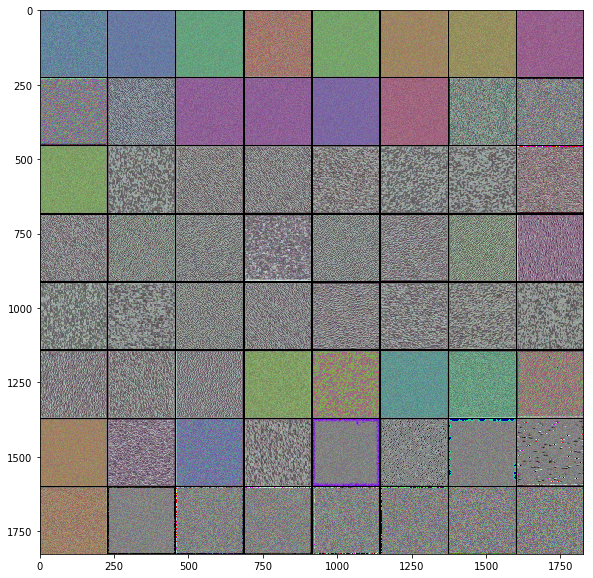

In [45]:
layer = layer_dict['block1_conv2']  # 64 filters
stitched_filters = generate_stiched_filters(layer, layer.filters)
plt.figure(figsize=(10,10))
plt.imshow(stitched_filters)

Processing block5_conv1 Layer
	 Processing filter 0
	 Processing filter 10
	 Processing filter 20
	 Processing filter 30
	 Processing filter 40
	 Processing filter 50
	 Processing filter 60
	 Time required to process 64 filters: 72.40691995620728
Filter collection: completed!


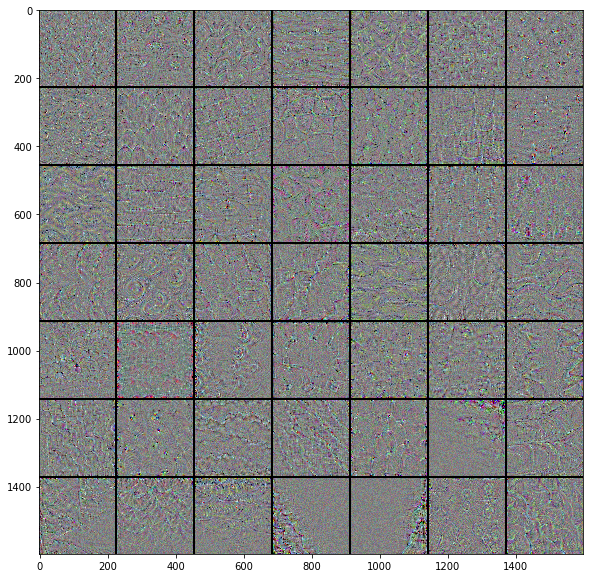

In [46]:
layer = layer_dict['block5_conv1']  # 512 filters in total
stitched_filters = generate_stiched_filters(layer, 64)
plt.figure(figsize=(10,10))
plt.imshow(stitched_filters)